/tmp/ipykernel_683/760203974.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gray = cm.get_cmap('gray', 256)
/tmp/ipykernel_683/760203974.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[row, col] = z_s @ theta_star


(512, 768)
(950, 49)
(950, 1)
(49, 49)
(49, 1)
[[ 0.026 -0.035  0.025  0.043  0.046  0.005 -0.   ]
 [ 0.023  0.005 -0.003  0.024  0.037 -0.014 -0.002]
 [-0.001 -0.017  0.069  0.129  0.006 -0.017 -0.008]
 [ 0.018 -0.012  0.079  0.183  0.086 -0.006  0.007]
 [-0.011  0.029  0.057  0.111  0.061 -0.011  0.014]
 [-0.023  0.013  0.018  0.023  0.028  0.001 -0.02 ]
 [-0.037  0.016  0.018 -0.012 -0.002  0.017  0.016]]


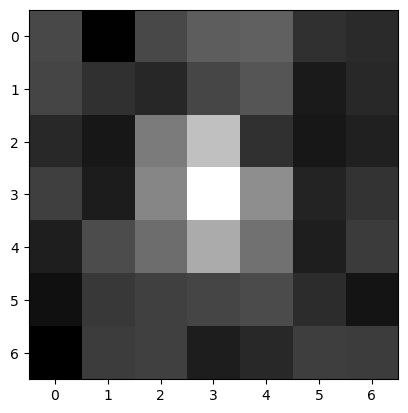

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm

gray = cm.get_cmap('gray', 256)
y = np.array(Image.open('img14g.tif'))
x = np.array(Image.open('img14sp.tif'))
print(x.shape)

sr = np.arange(20, y.shape[0], 20)
sc = np.arange(20, y.shape[1], 20)
num_rows = len(sr) * len(sc)
num_cols = 7*7
Z = np.zeros([num_rows, num_cols])
Y = np.zeros([num_rows, 1])

for i, row in enumerate(sr):
    for j, col in enumerate(sc):
        index = i * len(sc) + j
        Y[index] = y[row, col]
        Z[index] = x[row-3:row+4, col-3:col+4].flatten()

print(Z.shape)
print(Y.shape)

R_zz = Z.T @ Z / Y.shape[0]
r_zy = Z.T @ Y / Y.shape[0]
print(R_zz.shape)
print(r_zy.shape)

theta_star = np.linalg.inv(R_zz) @ r_zy
result = np.zeros(x.shape)

for row in range(x.shape[0]):
    for col in range(x.shape[1]):
        if row < 3 or col < 3 or row > x.shape[0] - 4 or col > x.shape[1] - 4:
            result[row, col] = 0
            continue
        z_s = x[row-3:row+4, col-3:col+4].flatten()
        # print(z_s)
        # print(z_s.shape)
        # print(theta_star.shape)
        result[row, col] = z_s @ theta_star

# print(np.amax(result))
result = np.clip(result, 0, 255)
imsave = Image.fromarray(result.astype(np.uint8))
# imsave.save('1-img14bl-restored.png')
imsave.save('1-img14sp-restored.png')
#print(bmatrix(np.round(theta_star, 3).reshape([7, 7])))
print(str(np.round(theta_star, 3).reshape([7, 7])))
plt.imshow(theta_star.reshape(7,7), cmap = 'gray')
plt.grid(False)
plt.show()




[[ 0.016  0.025  0.004  0.005 -0.009  0.03  -0.026]
 [-0.006  0.005  0.035  0.02   0.046  0.009  0.006]
 [-0.011 -0.013  0.067  0.073  0.047  0.028 -0.004]
 [-0.01  -0.016  0.047  0.23   0.089 -0.018  0.001]
 [-0.005 -0.023  0.042  0.111  0.064 -0.012  0.006]
 [-0.005  0.007  0.03   0.026  0.008 -0.007  0.019]
 [-0.006 -0.005  0.015  0.012  0.014  0.018  0.005]]


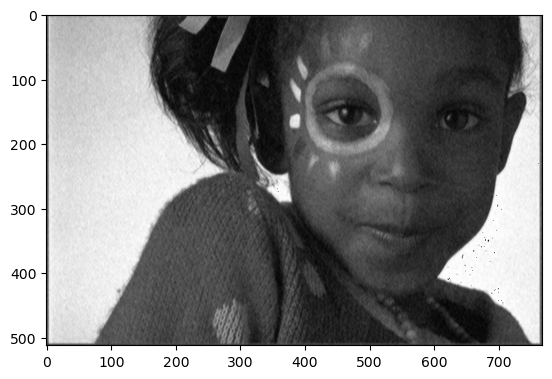

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

x = np.array(Image.open('img14gn.tif'))
y = np.array(Image.open('img14g.tif'))
x = x.astype(float)
y = y.astype(float)

r, c = y.shape
N = (r // 20) * (c // 20)
Z = np.zeros((N, 49))
Y = np.zeros(N)
t = 0
for i in range(1, r // 20 + 1):
    for j in range(1, c // 20 + 1):
        Y[t] = y[i * 20 - 1, j * 20 - 1]
        Z[t, :] = np.reshape(x[i * 20 - 4:i * 20 + 3, j * 20 - 4:j * 20 + 3], -1)
        t += 1

R_zz = np.dot(Z.T, Z) / N
r_zy = np.dot(Z.T, Y) / N

theta_esti = np.linalg.inv(R_zz).dot(r_zy)

theta = np.reshape(theta_esti, (7, 7))
thetaround = theta * 1000
displaytheta = np.floor(thetaround) / 1000
print(displaytheta)

imgout = convolve2d(x, theta, mode='same')

plt.figure()
plt.imshow(imgout.astype(np.uint8), cmap='gray')
plt.axis('image')
plt.show()
